In [ ]:
#here we test all the components.



In [ ]:
'''
first we test the core/interface extractor, since it is most essential
'''
%matplotlib inline
from eden.converter.graph.gspan import gspan_to_eden
import utils.draw as myutils
import utils.myeden as myed
import eden.graph as eg
import graphlearn as gl


#get a graph
gr = gspan_to_eden( 'data/bursi.pos.gspan' )
g=gr.next()


#lets see..
a=gl.extract_core_and_interface(1,g,radius_list=[2,3],thickness_list=[2],vectorizer=myed.MyVectorizer())
myutils.drawgraphs([ a[0].graph,a[1].graph ])


In [ ]:
'''
second is reading a grammar and training an estimator
'''
%matplotlib inline
import utils.draw as myutils
import graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden

gr = gspan_to_eden( 'data/bursi.pos.gspan' )
radius_list=[2,4]
thickness_list=[2]

sampler=gl.GraphLearnSampler(radius_list,thickness_list)
sampler.fit(gr,n_jobs=4)


print sampler.estimator
sampler.save('data/demo.ge')
myutils.draw_grammar(sampler.substitute_grammar,3)

51


DEBUG:log:select_cips_from_grammar didn't find any acceptable cip; entries_found 2
DEBUG:log:select_cips_from_grammar didn't find any acceptable cip; entries_found 8
DEBUG:log:select_cips_from_grammar didn't find any acceptable cip; entries_found 37
DEBUG:log:propose failed;received 0 cips, all of which failed either at substitution or feasibility  
DEBUG:log:propose failed;received 0 cips, all of which failed either at substitution or feasibility  
DEBUG:log:propose failed;received 0 cips, all of which failed either at substitution or feasibility  
sample failed; no propose after 4 successful improvement_steps
sample failed; no propose after 8 successful improvement_steps
sample failed; no propose after 16 successful improvement_steps
INFO:log:sample failed; no propose after 4 successful improvement_steps
INFO:log:sample failed; no propose after 8 successful improvement_steps
INFO:log:sample failed; no propose after 16 successful improvement_steps


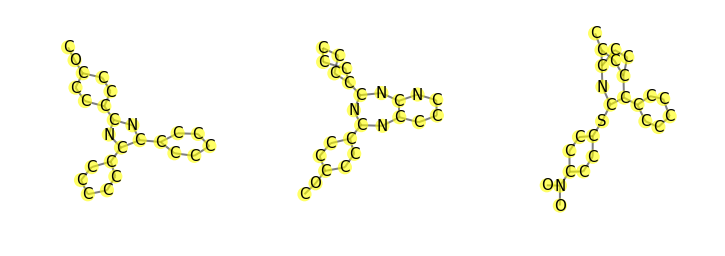

51


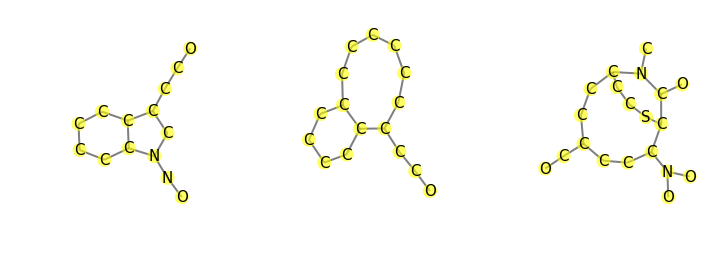

51


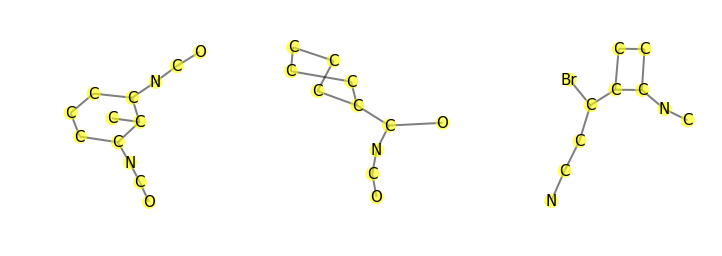

51


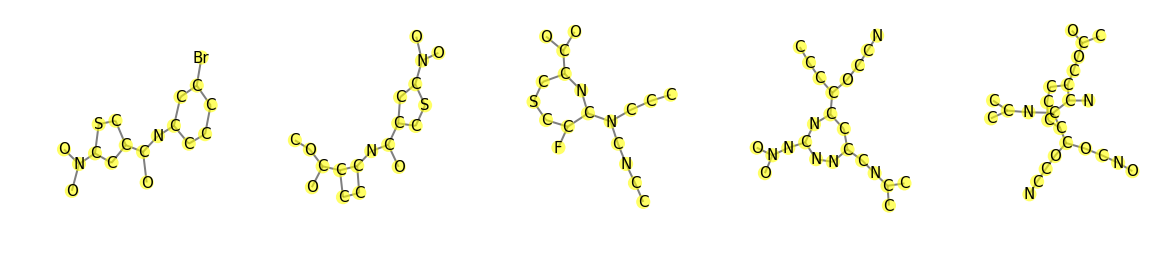

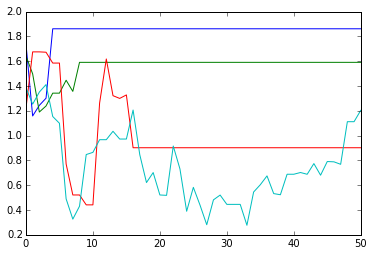

In [1]:
'''
now lets see if we can improve graphs
'''
%matplotlib inline
import utils.draw as myutils
import graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt


steps=50


sampler=gl.GraphLearnSampler()
sampler.load('data/demo.ge')
graphs = gspan_to_eden( 'data/bursi.pos.gspan' )
graphs = itertools.islice(graphs,4)
graphs = sampler.sample(graphs,same_radius=True,snapshot_interval=20,batch_size=1,n_steps=steps,n_jobs=4)

history=[]

for (result,info) in graphs:
    
    history.append(info['score_history'])
    myutils.drawgraphs(info['graphs'])
    
    
t = range(steps+1) 
for h in history:
    plt.plot(t, h)
plt.show()





In [ ]:
'''
inform me when done !
'''
import os
os.system("( speaker-test -t sine -f 1000 )& pid=$! ; sleep 0.5s ; kill -9 $pid")

In [ ]:
'''
demonstration of discussed thing :) 
'''

import networkx as nx

g=nx.Graph()
g.attrib= 5

h=g.copy()
print 'attrib' in g.__dict__

f=nx.Graph(g)
print 'attrib' in f.__dict__



g=nx.Graph()
g.add_path(["0","1"])
g.attrib=4
f=nx.Graph()
f.add_path(["0","1"])
G = nx.union(f,g , rename=('', '-'))
print 'attrib' in G.__dict__

In [ ]:
'''
HERE WE SEE WHY I USE SHUFFLE INSTEAD OF RANDOMCHOICE::: in the select_cips_from_grammar function...
-> pick at random as long as list of used indeces not as long as list?
-> leave it at the shuffeling?
'''
import random
%%time
x= range(1000000,0,-1)
for e in xrange(100):
    i=x.index(random.choice(x)) 
    x.remove(i)


In [ ]:
%%time
x= range(1000000,0,-1)
random.shuffle(x)
for e in xrange(100):
    i=x.pop() 


In [ ]:
o=Object()
o.n=3